# Introduction

## Problem statement and justification for the proposed approach.

# Libraries

#### Add requirments.txt later

In [ ]:
import pandas as pd
import numpy as np
# %pip install torch
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# EDA

In [ ]:
df =  pd.read_csv('../AAI510_Group6Project/World Stock Prices (Daily Updating)/World-Stock-Prices-Dataset.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-05-30 00:00:00-04:00,7.020000,7.240000,6.920000,7.100000,12750600.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-05-30 00:00:00-04:00,102.639999,102.940002,100.790001,102.000000,1505500.0,0.0,0.0,crocs,CROX,footwear,usa,NaN
2,2025-05-30 00:00:00-04:00,71.610001,72.470001,71.610001,72.099998,28013500.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,NaN
3,2025-05-30 00:00:00-04:00,125.080002,126.190002,123.750000,124.510002,82500.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
4,2025-05-30 00:00:00-04:00,294.970001,295.750000,291.630005,294.049988,5251700.0,0.0,0.0,american express,AXP,finance,usa,NaN


In [ ]:
df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
Dividends        float64
Stock Splits     float64
Brand_Name        object
Ticker            object
Industry_Tag      object
Country           object
Capital Gains    float64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [ ]:
df.dtypes

Date             datetime64[ns, UTC]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Dividends                    float64
Stock Splits                 float64
Brand_Name                    object
Ticker                        object
Industry_Tag                  object
Country                       object
Capital Gains                float64
dtype: object

In [ ]:

df_filtered = df.copy()
df_filtered = df_filtered[df_filtered["Country"] == "usa"]
df_filtered = df_filtered.drop(['Brand_Name', 'Capital Gains', 'Country', 'Industry_Tag', 'Stock Splits', 'Dividends'], axis=1)
df_filtered.head()


,Date,Open,High,Low,Close,Volume,Ticker
0,2025-05-30 04:00:00+00:00,7.020000,7.240000,6.920000,7.100000,12750600.0,PTON
1,2025-05-30 04:00:00+00:00,102.639999,102.940002,100.790001,102.000000,1505500.0,CROX
2,2025-05-30 04:00:00+00:00,71.610001,72.470001,71.610001,72.099998,28013500.0,KO
4,2025-05-30 04:00:00+00:00,294.970001,295.750000,291.630005,294.049988,5251700.0,AXP
6,2025-05-30 04:00:00+00:00,361.350006,367.040009,361.350006,365.190002,8726000.0,V


In [ ]:
df_filtered.set_index('Date', inplace=True)
df_filtered.head()

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2025-05-30 04:00:00+00:00,7.020000,7.240000,6.920000,7.100000,12750600.0,PTON
2025-05-30 04:00:00+00:00,102.639999,102.940002,100.790001,102.000000,1505500.0,CROX
2025-05-30 04:00:00+00:00,71.610001,72.470001,71.610001,72.099998,28013500.0,KO
2025-05-30 04:00:00+00:00,294.970001,295.750000,291.630005,294.049988,5251700.0,AXP
2025-05-30 04:00:00+00:00,361.350006,367.040009,361.350006,365.190002,8726000.0,V


In [ ]:
df_filtered.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Ticker    0
dtype: int64

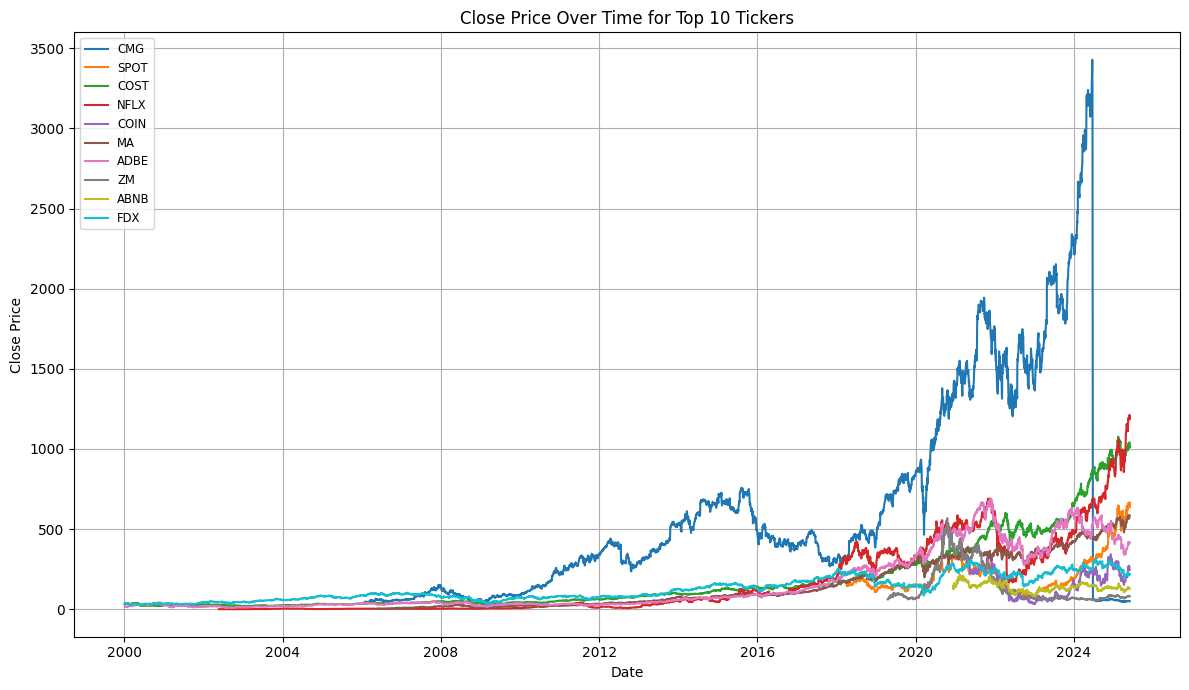

In [ ]:
top_tickers = (
    df_filtered.groupby("Ticker")["Close"]
    .mean()
    .nlargest(10)
    .index
)

plt.figure(figsize=(12, 7))
for ticker in top_tickers:
    df_ticker = df_filtered[df_filtered["Ticker"] == ticker]
    plt.plot(df_ticker.index, df_ticker["Close"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Close Price Over Time for Top 10 Tickers")
plt.legend(loc="upper left", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_stock = df_filtered[df_filtered["Ticker"] == "NFLX"].copy()
df_stock = df_stock.sort_index()

In [ ]:
df_stock.head()

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2002-05-23 04:00:00+00:00,1.156429,1.242857,1.145714,1.196429,104790000.0,NFLX
2002-05-24 04:00:00+00:00,1.214286,1.225000,1.197143,1.210000,11104800.0,NFLX
2002-05-28 04:00:00+00:00,1.213571,1.232143,1.157143,1.157143,6609400.0,NFLX
2002-05-29 04:00:00+00:00,1.164286,1.164286,1.085714,1.103571,6757800.0,NFLX
2002-05-30 04:00:00+00:00,1.107857,1.107857,1.071429,1.071429,10154200.0,NFLX


In [ ]:
df_fe = df_stock.copy()

df_fe['Close_lag_1'] = df_fe['Close'].shift(1)

df_fe['Return_1d'] = df_fe['Close'].pct_change()

df_fe['MA_5'] = df_fe['Close'].rolling(window=5).mean()
df_fe['MA_20'] = df_fe['Close'].rolling(window=20).mean()

df_fe['Volatility_10d'] = df_fe['Close'].rolling(window=10).std()

df_fe['Volume_MA_10'] = df_fe['Volume'].rolling(window=10).mean()
df_fe['Volume_Ratio'] = df_fe['Volume'] / df_fe['Volume_MA_10']

df_fe.dropna(inplace=True)
features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'Close_lag_1', 'Return_1d',
    'MA_5', 'MA_20',
    'Volatility_10d',
    'Volume_Ratio'
]


# Data preparation & Feature engineering – data pre-processing – missing values, outliers, etc.
# Feature Selection – how were the features selected based on the data analysis?

# Model Training
## selection, comparison, tuning, and analysis – consider ensembles.

## I. Logistic Regression

### 1.Parameters

We define a few key parameters. First, `n_lags`: how many past days to include as features. Secondly, `horizon`: how many days ahead to forecast or what is known as a time-step. Last, `test_pct`: which is the train test split percentage for our dataset to use in walk-forward testing.

Before, we attempted to forecast using simple lagged data and multi-output regression did not generalize well over longer horizons. Now, we found that a walk-forward forecast which means predicting one step at a time and feeding the result back to the model, gave more consistent results, even for a linear model.

In [ ]:
n_lags   = 5       # last 5 days to use for prediction
horizon  = 20      # 20 days for time step
test_pct = 0.20    # train test split of 80/20

### 2. Prepare dataset columns and Splitting Train/Test

Here we grab the necessary columns from the stock dataframe and sort it by date. We also assign the train/test split index based on the percentage specified earlier with `test_pct`. Earlier, we tried using multiple tickers but found that focusing on a single stock with consistent structure and clean data gave more stable feature sets. We are also using a sorted index to ensure time-series alignment, which is crucial for forecasting.

In [ ]:
df = df_stock[['Open', 'High', 'Low', 'Close']].copy().sort_index() # sort and get required features only

# split index for walk-forward forecasting, its a method to evaluate the model by updating continuously like the real stock market
n_total   = len(df)
split_idx = int(n_total * (1 - test_pct))  # first test index

### 3. Generate a matrix with lagged features to train model

To help the model learn patterns over time, we create a matrix with lagged versions of each column up to the amount of days in the past, which we defined with the `n_lags` parameter. This is a method that is used in time-series modeling that helps linear models have better memory for short periods for the recent behavior of prices. This cell is a replacement for our earlier approach to feature engineer. Before, we used rolling averages and volatility. While those features were useful, we choose to use a pure lag-based approach to maintain compatibility with the linear model and walk-forward loop.

In [ ]:
def make_lag_table(data, lags): # generate lagged features for a number of past days
    out = data.copy()
    for lag in range(1, lags + 1): # for each lag, shift the feautres and name the cols respectivly
        out[[f'{c}_lag{lag}' for c in ['Open', 'High', 'Low', 'Close']]] = (
            data[['Open', 'High', 'Low', 'Close']].shift(lag)
        )
    return out.dropna() # drop row with empty values that were created by shifting the features

lagged = make_lag_table(df, n_lags) # make a table for lagged features so we can use it for the model learning

# use only the training part
train  = lagged.loc[: df.index[split_idx-1]]
X_train = train[[c for c in lagged.columns if 'lag' in c]]
y_train = train['Close'] # the closing price of the current day in the loop

# fit the model with the data
model = LinearRegression().fit(X_train, y_train)

### 4. Walk-forward Prediction

We now use the walk-forward prediction method which goes as follows. For each 20-day chunk in the test set, we initialize the
forecast by taking the last `n_lags` actual prices before the block and then generate synthetic predicted prices step-by-step. Then, each prediction is fed back into the history to build the next input. This strategy that recurses using the loop lets us simulate how the model would perform in a real-world forecasting setting without leakage.

Previously, we would try to predict all 20 future days at once which resulted in drift and compounding errors. This method, while slightly computationally slower, is closer to how time-series models are used in a real-world scenario.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # ignore warnings

In [ ]:
pred_dates, pred_vals = [], [] # store the predictions and the prediction dates

start = split_idx # starting walk-forward testing
while start < n_total:
    end = min(start + horizon, n_total) # end of the forecast

    # use the dataset before we use the test window
    history = df.iloc[start - n_lags : start].copy()

    for step in range(start, end): # create a vector from the last lag observation
        feats = []
        for lag in range(1, n_lags + 1):
            r = history.iloc[-lag]
            feats.extend([r['Open'], r['High'], r['Low'], r['Close']])

        next_close = model.predict(np.array(feats).reshape(1, -1))[0] # next day close prediction
        pred_dates.append(df.index[step])
        pred_vals.append(next_close)

        # add synthetic row to extend the history for the forecast
        synth = history.iloc[-1].copy()
        synth['Close'] = next_close # update the close
        history = pd.concat([history, pd.DataFrame([synth])])

    start = end

# store predictions as a pandas series
pred_series = pd.Series(pred_vals, index=pred_dates, name='Pred_Close')

### 5. Evaluation Metrics and Plot

For the last step, we compare our predicted series to the actual `Close` prices over the test set and compute two metrics, RMSE, which measures the average prediction error magnitude. And then we use R^2, which measures how well our model understands the variance in `Close` prices.

Our results show an RMSE of 49.17, which means the model keeps its errors pretty small relative to how much the stock moves. Even better, the R^2 of 0.96 means it explained over 96% of the variation in actual prices, which is a really strong result for a model that is as simple as linear regression. When we look at the chart, the predicted line tracks the real closing prices surprisingly well, even over longer 20-day stretches. Other methods we tried, like predicting one day at a time or doing rolling forecasts resulted in either the prediction flattening out or getting off track quickly. This chunked walk-forward method ended up being a much more stable and reliable way to forecast.

RMSE : 49.1653
R2: 0.9606


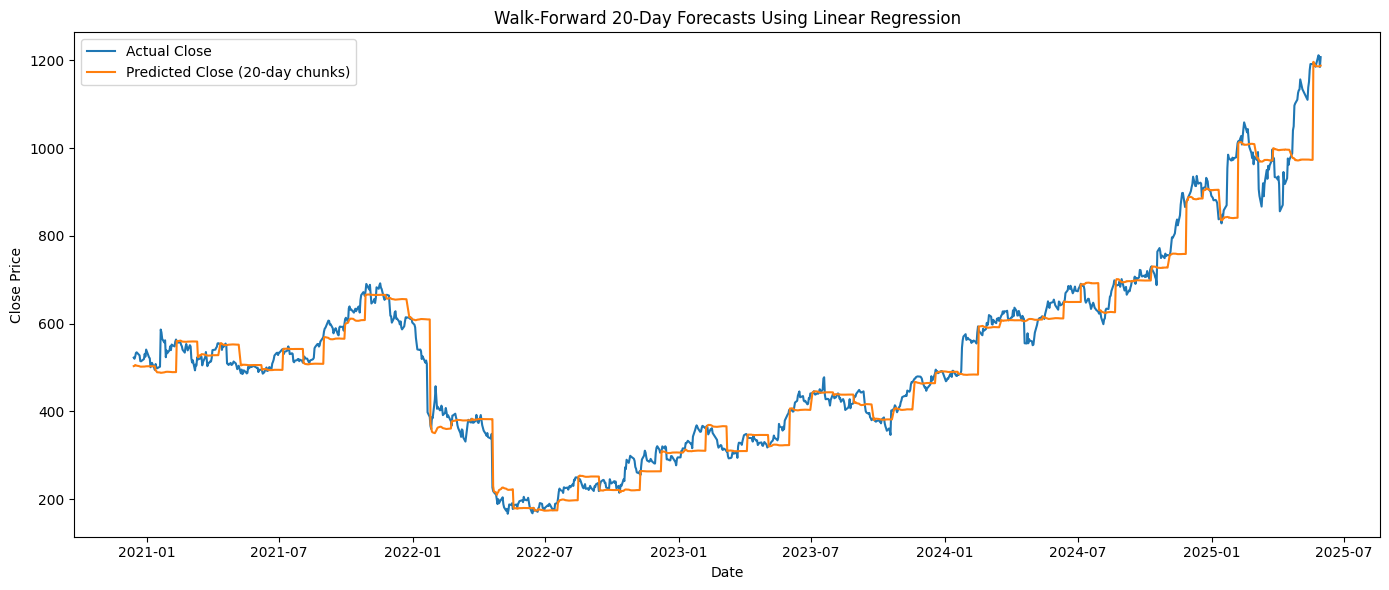

In [ ]:
# slice the actual closing price so they match the prediction dates
y_test = df['Close'].loc[pred_series.index]
y_test, pred_series = y_test.align(pred_series, join='inner')

mse = mean_squared_error(y_test, pred_series) # RMSE didnt work by itself so used MSE and then used sqrt
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_series)

print(f'RMSE : {rmse:,.4f}')
print(f'R2: {r2:,.4f}')

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Close')
plt.plot(pred_series.index, pred_series, label='Predicted Close (20-day chunks)')
plt.title('Walk-Forward 20-Day Forecasts Using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

## II. LSTM

After multiple iterations extra features were increasing error rates so we selected open, high, low, and close as the features used to train and the goal is to predict future closing prices.

In [ ]:
features = [
    'Open', 'High', 'Low', 'Close']
df_stock = df_fe[features]

A 80%/20% train test split was used and scaled fpr training purposes

In [ ]:
train_size = int(len(df_stock) * 0.8)
df_train = df_stock.iloc[:train_size]
df_test = df_stock.iloc[train_size:]

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train)

To prepare the dataset for time series forecasting, the raw input data was transformed into a supervised learning format using a sliding window approach. Specifically, a function was implemented to generate input-output pairs for the model, where each input represents a fixed-length sequence of past time steps, and the output corresponds to the target value (the closing price) at the next time step.

Sequence Construction Details:
A sequence length (seq_length) of 20 days was used, meaning each input sample (X) consists of the feature values over 20 consecutive time steps.

The corresponding target (y) is the closing price on the 21st day, i.e., the day immediately following the input sequence.

The function iterates through the dataset to extract all possible overlapping sequences, enabling the model to learn from a rich set of temporal patterns.

Tensor Preparation:
The input (X_train) and target (y_train) arrays are converted to PyTorch tensors to facilitate training in a deep learning framework.

The target tensor is reshaped to have two dimensions ((N, 1)) to match the expected output shape of the model.

Purpose:
This preprocessing step transforms the time series problem into a format suitable for sequence-based models like Long Short-Term Memory (LSTM) networks. By leveraging historical windows of data, the model is trained to predict future stock closing prices based on past trends and patterns.



In [ ]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length, features.index('Close')]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 20
X_train, y_train = create_sequences(scaled_train, seq_length)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

A custom LSTM-based neural network was implemented using PyTorch to predict next-day closing prices from historical stock data.

The model consists of a two-layer LSTM network with 128 hidden units per layer and a dropout rate of 0.2 to prevent overfitting. It accepts sequences of multivariate input features and processes them in a batch-first format.

Only the final hidden state from the last time step is used for prediction. This output is passed through a fully connected linear layer that maps the hidden state to a single scalar value representing the predicted closing price.

This architecture captures temporal patterns effectively, making it suitable for time series forecasting.

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = LSTMModel(input_size=len(features), hidden_size=128)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.1291
Epoch 10, Loss: 0.0328
Epoch 20, Loss: 0.0037
Epoch 30, Loss: 0.0015
Epoch 40, Loss: 0.0011


A recursive forecasting loop was implemented to generate multi-step future predictions using the trained LSTM model. Each prediction is based on a rolling 20 day sequence of past stock data.

To begin, the final 20 day sequence from the training data is used as the initial input. This sequence is passed through the model to predict the next day closing price. The predicted value replaces the actual closing price in the corresponding scaled test row to maintain temporal consistency.

The updated row is then appended to the input sequence, and the window is shifted forward by one day and dropping the oldest entry and including the newest. This updated 20 day sequence is used to predict the following day’s closing price. The process is repeated iteratively across the entire test period.

This step wise prediction strategy allows the model to simulate real world use cases, where future data must be inferred one day at a time based on recent history and prior predictions.

In [ ]:
scaled_test = scaler.transform(df_test[features])
input_seq = scaled_train[-seq_length:].copy()
future_preds = []

for i in range(len(df_test)):
    input_tensor = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        next_scaled = model(input_tensor).item()

    actual_next_row = scaled_test[i].copy()
    actual_next_row[features.index('Close')] = next_scaled

    future_preds.append(actual_next_row.copy())
    input_seq = np.vstack([input_seq[1:], actual_next_row])



The predicted values, originally in scaled form, are reshaped to match the scaler’s expected input shape. Using the fitted MinMaxScaler, the data is inverse-transformed to restore the original value range. The closing prices are then extracted from the transformed output, yielding final predictions in actual price units.

In [ ]:
pred_arr = np.array(future_preds).reshape(-1, len(features))
predicted_closes = scaler.inverse_transform(pred_arr)[:, features.index('Close')]


The predicted closing values versus the actual closing values for the test set were plotted to view the differences

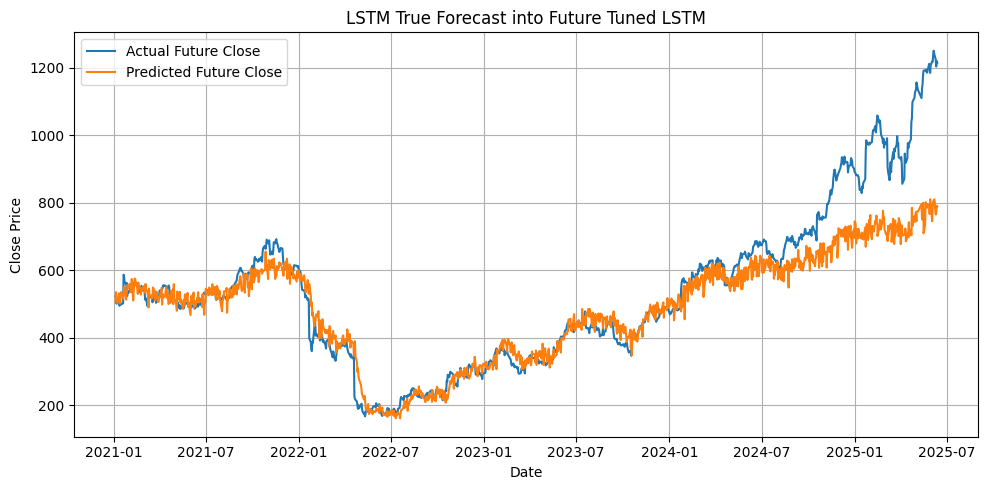

In [ ]:
actual_closes = df_test['Close'].values

plt.figure(figsize=(10, 5))
plt.plot(df_test.index, actual_closes, label='Actual Future Close')
plt.plot(df_test.index,predicted_closes, label='Predicted Future Close')
plt.title("LSTM True Forecast into Future Tuned LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


predicted = predicted_closes
actual = actual_closes

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
r2 = r2_score(actual, predicted)
directional_accuracy = np.mean(np.sign(np.diff(actual)) == np.sign(np.diff(predicted)))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")
print(f"Directional Accuracy: {directional_accuracy:.2%}")


MAE: 65.0402
RMSE: 112.5945
MAPE: 9.73%
R²: 0.7754
Directional Accuracy: 47.43%


The stock price prediction model demonstrates strong regression performance, with a Mean Absolute Error ( MAE ) of 65.04 Dollars, Root Mean Squared Error  ( RMSE )  of 112.59 Dollars, and a Mean Absolute Percentage Error (MAPE) of 9.73%, indicating reasonable accuracy across different price levels. The R² score of 0.7754 shows that the model explains approximately 77.5% of the variance in actual closing prices, which is a solid outcome given the volatility of financial markets. However, the directional accuracy is only 47.43%, falling below the 50% threshold required for reliable trend forecasting. This limits its practical utility for trading applications. To improve, future efforts should focus on enhancing directional prediction through classification models, incorporating technical indicators (e.g., moving averages, RSI), or adopting hybrid approaches that combine both regression and classification techniques.


# Model Comparison

### 1. Extracting LSTM and ARIMA Models

In [ ]:
notebook_files = { # path to notebooks of team members and their respective models
    "Pallav_LSTM": "./Other Models/FinalProject_1_Pallav.ipynb",
    "Anitra_ARIMA": "./Other Models/StockPredictorCode_AH_FINAL.ipynb"
}


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import torch
import torch.nn as nn

# LSTM Model (from Pallav)
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

lstm_model = LSTMModel(input_size=4, hidden_size=128)


# ARIMA Model Placeholder (from Anitra)
# ARIMA models are trained inline with dynamic windows during forecasting.
# There is no reusable class or saved object to extract.

# Example usage:
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(train_series, order=(p,d,q))
# model_fit = model.fit()
# forecast = model_fit.forecast(steps=forecast_horizon)


### 2. Evaluation and Visualization for All 3 Models


Model Comparison:

LSTM RMSE: 101.25
LSTM R^2:   0.8032
ARIMA RMSE: 20.60
ARIMA R^2:   0.9920
Linear Regression RMSE: 49.17
Linear Regression R^2:   0.9606


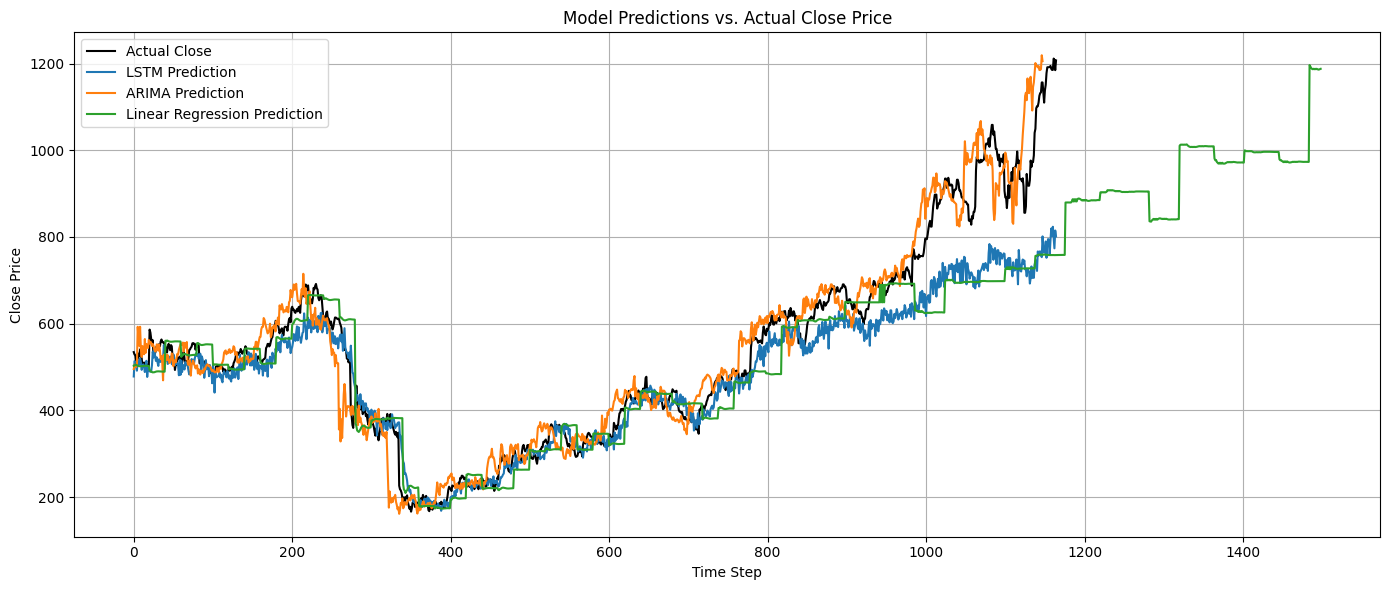

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

lstm_preds = np.load(".//Other Models/lstm_preds.npy")
lstm_actuals = np.load(".//Other Models/lstm_actuals.npy")

arima_preds = np.load(".//Other Models/arima_preds.npy")
arima_actuals = np.load(".//Other Models/arima_actuals.npy")

lr_preds = pred_series.values         # prediected Close from LR
lr_actuals = y_test.values            # actual Close from LR test set

# evaluate each model
def evaluate_model(name, preds, actuals):
    mse = mean_squared_error(actuals, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(actuals, preds)
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R^2:   {r2:.4f}")
    return rmse, r2

print("\nModel Comparison:\n")
rmse_lstm, r2_lstm = evaluate_model("LSTM", lstm_preds, lstm_actuals)
rmse_arima, r2_arima = evaluate_model("ARIMA", arima_preds, arima_actuals)
rmse_lr, r2_lr = evaluate_model("Linear Regression", lr_preds, lr_actuals)

# plot all model predictions from models vs actual values
plt.figure(figsize=(14, 6))
plt.plot(lstm_actuals, label='Actual Close', color='black', linewidth=1.5)
plt.plot(lstm_preds, label='LSTM Prediction')
plt.plot(arima_preds, label='ARIMA Prediction')
plt.plot(lr_preds, label='Linear Regression Prediction')
plt.title("Model Predictions vs. Actual Close Price")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3. Model Comparison Summary

The performance of the three models not only highlights their accuracy but also how well they handle real-world forecasting scenarios. ARIMA finished the strongest overall with an RMSE of 20.60 and an R^2 of 0.9920. It handled trends and even instability well, which makes sense since ARIMA is designed for time series problems. Its simplicity was a real advantage. It was quick to run and didn’t require much tuning or engineered features to work.

Linear regression surprised us. It achieved an RMSE of 49.17 and an R^2 of 0.9606, managing to explain more than 96 percent of the variance in closing prices. The key here was the walk-forward approach, which allowed it to forecast 20 days ahead without accumulating too much error. While it’s not as flexible or accurate as ARIMA, it’s fast and easy to interpret, which makes it useful in many real-world cases.

The LSTM model didn’t perform as well. It got an RMSE of 101.25 and an R² of 0.8032. While it captured the overall trend, it struggled with sharper movements and probably needed more data or deeper tuning. LSTM has the potential to outperform traditional models, but in our case, it didn’t offer a clear edge. It was also the slowest model to run, which made it less practical for quick prototyping or small datasets.

One limitation of all three models is that we didn’t include any external data like news or macroeconomic indicators, only past price data. Also, the results we got from this particular stock ticker might not generalize to others. Runtime was another factor. ARIMA and linear regression ran quickly and were easy to manage, while LSTM was slower and more complex.

Overall, ARIMA was the most accurate and consistent. Linear regression was a strong and efficient fallback, and the LSTM showed promise but didn’t deliver without more tuning.

# Deployment - A discussion of either the hypothetical deployment of the model or the actual deployment of the model if it has been deployed.

# Discussion and conclusions – address the problem statement and recommendation.